In [121]:
import numpy as np
import os
import pandas as pd
from matplotlib import mlab
import matplotlib.pyplot as plt

from src.data.make_dataset import BCIDataset
from src.visualization.plotting import plot_data, plot_data_logvar, plot_LDA
from src.data.signal_processing import best_csp_components, logvar, train_lda

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
subjects = ["anna"]
measurements = ["2023-02-20_17-52-36_with_timecorr"]

data_root = "C:/Users/annag/OneDrive - Danmarks Tekniske Universitet/Semester_04/Special_Course_BCI/03_code/BCI_stroke_rehab/data/raw/"

# Create dataset

In [123]:
trainingset = BCIDataset(data_root, subjects, measurements)

In [124]:
trainingset.data.head()

,subject,measurement,class,sampleID,path,sample
0,anna,2023-02-20_17-52-36_with_timecorr,arm_left,10,arm_left_10_1676912164.csv,Unnamed: 0 class time_in_s C...
1,anna,2023-02-20_17-52-36_with_timecorr,arm_left,11,arm_left_11_1676912181.csv,Unnamed: 0 class time_in_s C...
2,anna,2023-02-20_17-52-36_with_timecorr,arm_left,13,arm_left_13_1676912214.csv,Unnamed: 0 class time_in_s C...
3,anna,2023-02-20_17-52-36_with_timecorr,arm_left,15,arm_left_15_1676912247.csv,Unnamed: 0 class time_in_s C...
4,anna,2023-02-20_17-52-36_with_timecorr,arm_left,18,arm_left_18_1676912297.csv,Unnamed: 0 class time_in_s C...


# Preprocessing

## Validate data

In [125]:
trainingset.validate_data()

Total invalid samples: 2


## Filter data

In [126]:
trainingset.apply_bandpass_filtering(selected_data="sample")

# Create training data

In [127]:
mode = ["class_as_array","class_as_key"][1]
test_size = 0.2

In [128]:
training_data = trainingset.create_training_data(test_size, mode)

Split dataset in 30 train and 8 test samples.
Best CSP components: [0, 15]


In [129]:
training_data.keys()

dict_keys(['train', 'test'])

In [130]:
training_data['test'].keys()

dict_keys(['arm_left', 'arm_right'])

In [131]:
trainingset.data.head()

,subject,measurement,class,sampleID,path,sample,filtered,train_split,csp
0,anna,2023-02-20_17-52-36_with_timecorr,arm_left,10,arm_left_10_1676912164.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T4...,train,time_in_s CZ C4 T4 ...
1,anna,2023-02-20_17-52-36_with_timecorr,arm_left,11,arm_left_11_1676912181.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T4...,train,time_in_s CZ C4 T4 ...
2,anna,2023-02-20_17-52-36_with_timecorr,arm_left,13,arm_left_13_1676912214.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T...,train,time_in_s CZ C4 T4 ...
3,anna,2023-02-20_17-52-36_with_timecorr,arm_left,15,arm_left_15_1676912247.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T4 ...,train,time_in_s CZ C4 T4 ...
4,anna,2023-02-20_17-52-36_with_timecorr,arm_left,18,arm_left_18_1676912297.csv,Unnamed: 0 class time_in_s C...,time_in_s CZ C4 T4 ...,train,time_in_s CZ C4 T4 ...


# Apply LDA

In [132]:
print(np.shape(training_data['train']['arm_left']))
W, b = train_lda(class1 = training_data['train']['arm_left'], class2 = training_data['train']['arm_right'])

(16, 2)


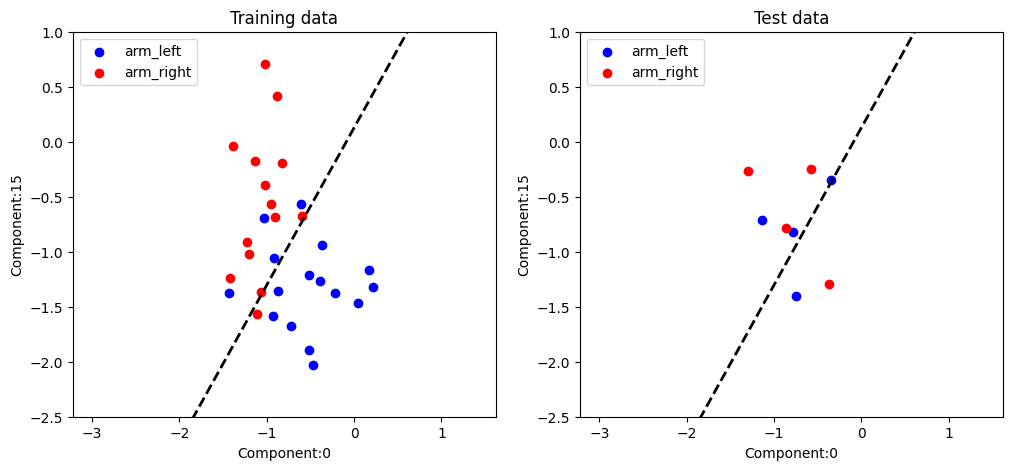

In [133]:
plot_LDA(training_data['train'], training_data['test'], b, W, trainingset.classes, trainingset.selected_csp_components)